In [1]:
# --- 1. Importación de librerías ---
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
train_df = pd.read_csv('D:/Univerisidad/7mo semestre/SIS420 LABS/1erPARCIAL/dota2Train.csv', header=None)
test_df = pd.read_csv('D:/Univerisidad/7mo semestre/SIS420 LABS/1erPARCIAL/dota2Test.csv', header=None)

# Convertir etiquetas: -1 -> 0 (clase binaria)
y_train = train_df.iloc[:, 0].replace(-1, 0).values
X_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].replace(-1, 0).values
X_test = test_df.iloc[:, 1:].values

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Dataset y DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [4]:
class DotaNN(nn.Module):
    def __init__(self):
        super(DotaNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()  # salida binaria
        )
        
    def forward(self, x):
        return self.model(x)

model = DotaNN()


In [5]:
criterion = nn.BCELoss()  # binary cross-entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
num_epochs = 30
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    train_losses.append(epoch_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}")


c:\Python312\Lib\site-packages\torch\autograd\graph.py:823: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\c10\cuda\CUDAFunctions.cpp:109.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1/30, Loss: 0.6715
Epoch 2/30, Loss: 0.6645
Epoch 3/30, Loss: 0.6618
Epoch 4/30, Loss: 0.6602
Epoch 5/30, Loss: 0.6583
Epoch 6/30, Loss: 0.6554
Epoch 7/30, Loss: 0.6536
Epoch 8/30, Loss: 0.6523
Epoch 9/30, Loss: 0.6494
Epoch 10/30, Loss: 0.6480
Epoch 11/30, Loss: 0.6466
Epoch 12/30, Loss: 0.6452
Epoch 13/30, Loss: 0.6442
Epoch 14/30, Loss: 0.6426
Epoch 15/30, Loss: 0.6409
Epoch 16/30, Loss: 0.6399
Epoch 17/30, Loss: 0.6387
Epoch 18/30, Loss: 0.6383
Epoch 19/30, Loss: 0.6361
Epoch 20/30, Loss: 0.6362
Epoch 21/30, Loss: 0.6352
Epoch 22/30, Loss: 0.6331
Epoch 23/30, Loss: 0.6320
Epoch 24/30, Loss: 0.6323
Epoch 25/30, Loss: 0.6306
Epoch 26/30, Loss: 0.6301
Epoch 27/30, Loss: 0.6293
Epoch 28/30, Loss: 0.6284
Epoch 29/30, Loss: 0.6269
Epoch 30/30, Loss: 0.6265


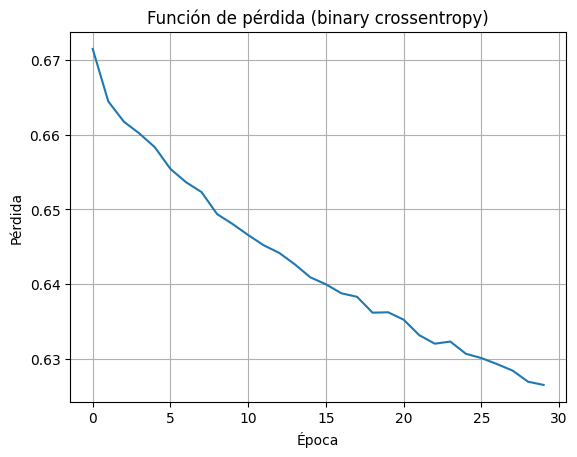

In [7]:
plt.plot(train_losses)
plt.title("Función de pérdida (binary crossentropy)")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()


Precisión en test: 0.5917

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.60      0.38      0.46      4792
           1       0.59      0.78      0.67      5502

    accuracy                           0.59     10294
   macro avg       0.59      0.58      0.57     10294
weighted avg       0.59      0.59      0.57     10294



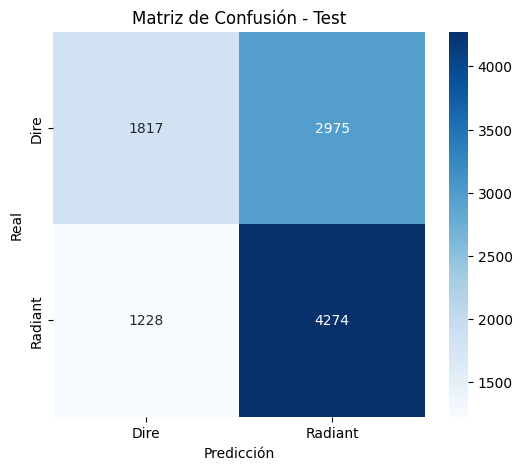

In [8]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor).numpy()
    y_pred_labels = (y_pred_probs > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_labels)
cm = confusion_matrix(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

print(f"Precisión en test: {acc:.4f}")
print("\nReporte de clasificación:\n", report)

# Matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dire', 'Radiant'], yticklabels=['Dire', 'Radiant'])
plt.title('Matriz de Confusión - Test')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()
